In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

In [2]:
dir(transforms)

['AutoAugment',
 'AutoAugmentPolicy',
 'CenterCrop',
 'ColorJitter',
 'Compose',
 'ConvertImageDtype',
 'FiveCrop',
 'GaussianBlur',
 'Grayscale',
 'InterpolationMode',
 'Lambda',
 'LinearTransformation',
 'Normalize',
 'PILToTensor',
 'Pad',
 'RandAugment',
 'RandomAdjustSharpness',
 'RandomAffine',
 'RandomApply',
 'RandomAutocontrast',
 'RandomChoice',
 'RandomCrop',
 'RandomEqualize',
 'RandomErasing',
 'RandomGrayscale',
 'RandomHorizontalFlip',
 'RandomInvert',
 'RandomOrder',
 'RandomPerspective',
 'RandomPosterize',
 'RandomResizedCrop',
 'RandomRotation',
 'RandomSizedCrop',
 'RandomSolarize',
 'RandomVerticalFlip',
 'Resize',
 'Scale',
 'TenCrop',
 'ToPILImage',
 'ToTensor',
 'TrivialAugmentWide',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'autoaugment',
 'functional',
 'functional_pil',
 'functional_tensor',
 'transforms']

In [3]:
transform = transforms.Compose([ # Compose can be used to apply multiple transforms sequentially
    transforms.Resize(256),
    transforms.ToTensor(),
])

In [4]:
dataset = torchvision.datasets.CIFAR10(root='./data/cifar10/train', transform=transform, download=False)
# download=False is used to avoid downloading the dataset from the internet as it is already present

In [5]:
dataset

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: ./data/cifar10/train
    Split: Train
    StandardTransform
Transform: Compose(
               Resize(size=256, interpolation=bilinear, max_size=None, antialias=None)
               ToTensor()
           )

In [6]:
dataloader = torch.utils.data.DataLoader(
    dataset,
    batch_size=16,
    shuffle=True,
    num_workers=2,
)

In [7]:
images_batch, label_batch = iter(dataloader).next()

In [8]:
images_batch.shape

torch.Size([16, 3, 256, 256])

In [9]:
label_batch

tensor([4, 1, 0, 1, 2, 2, 1, 4, 3, 9, 0, 8, 4, 5, 3, 2])

In [10]:
img = torchvision.utils.make_grid(images_batch) # make_grid is used to convert a batch of images to a grid

In [11]:
img.shape

torch.Size([3, 518, 2066])

In [12]:
import numpy as np
# move channel to the last dimension
img = np.transpose(img, (1, 2, 0))
img.shape

torch.Size([518, 2066, 3])

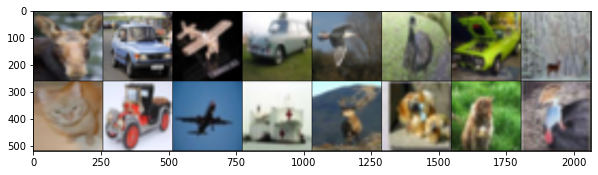

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.imshow(img);

In [15]:
pop_mean, pop_std = [], []

In [16]:
for i, data in enumerate(dataloader, 0):
    numpy_image = data[0].numpy()
    batch_mean = np.mean(numpy_image, axis=(0,2,3))
    batch_std = np.std(numpy_image, axis=(0,2,3))
    pop_mean.append(batch_mean)
    pop_std.append(batch_std)

In [17]:
pop_mean = np.array(pop_mean)
pop_std = np.array(pop_std)
pop_mean.shape, pop_std.shape

((3125, 3), (3125, 3))

In [18]:
pop_mean = np.mean(pop_mean, axis=0)
pop_std = np.mean(pop_std, axis=0)
pop_mean, pop_std

(array([0.49159086, 0.48234618, 0.44671965], dtype=float32),
 array([0.23836996, 0.23496775, 0.25273117], dtype=float32))

In [19]:
tarnsform = transforms.Compose([
    transforms.Resize(256),
    transforms.RandomResizedCrop(224),
    transforms.ColorJitter(),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(pop_mean, pop_std),
])

In [20]:
trainset = torchvision.datasets.CIFAR10(root='./data/cifar10/train', transform=tarnsform, download=False)

In [21]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=16, shuffle=True, num_workers=2)

In [22]:
images_batch, labels_batch = iter(trainloader).next()

In [23]:
images_batch.shape

torch.Size([16, 3, 224, 224])

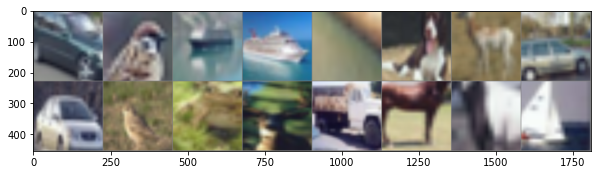

In [25]:
img = torchvision.utils.make_grid(images_batch)
img = np.transpose(img, (1, 2, 0))
m, M = img.min(), img.max()
img = (1/(abs(m)*M))*img + 0.5 # Transsforming the image to [0,1]
plt.figure(figsize=(10,10))
plt.imshow(img);